In [1]:
# import pandas library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Reading csv file
df = pd.read_csv("Heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df.shape

(303, 14)

In [20]:
df = df.drop_duplicates()

In [21]:
df.shape

(302, 14)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
age         302 non-null int64
sex         302 non-null int64
cp          302 non-null int64
trtbps      302 non-null int64
chol        302 non-null int64
fbs         302 non-null int64
restecg     302 non-null int64
thalachh    302 non-null int64
exng        302 non-null int64
oldpeak     302 non-null float64
slp         302 non-null int64
caa         302 non-null int64
thall       302 non-null int64
output      302 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [23]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [24]:

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
df.fbs.unique()

array([1, 0], dtype=int64)

In [28]:
subSet1 = df[['age','cp','chol','thalachh']]

In [29]:
subSet2 = df[['age','exng','slp','output']]

In [30]:
merged_df = subSet1.merge(right=subSet2,on='age')
merged_df.head()

,age,cp,chol,thalachh,exng,slp,output
0,63,3,233,150,0,0,1
1,63,3,233,150,0,2,1
2,63,3,233,150,0,2,1
3,63,3,233,150,0,1,0
4,63,3,233,150,1,2,0


In [31]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [36]:
def remove_outlier(col):
    q3=col.quantile(0.75)
    q1=col.quantile(0.25)
    iqr=q3-q1
    threshold= iqr*1.5
    outlier_mask=(col<q1-threshold)|(col>q3+threshold)
    return col[~outlier_mask]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
age         302 non-null int64
sex         302 non-null int64
cp          302 non-null int64
trtbps      302 non-null int64
chol        302 non-null int64
fbs         302 non-null int64
restecg     302 non-null int64
thalachh    302 non-null int64
exng        302 non-null int64
oldpeak     302 non-null float64
slp         302 non-null int64
caa         302 non-null int64
thall       302 non-null int64
output      302 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [38]:
col_name=['cp','thalachh','exng','oldpeak','slp','caa']

In [39]:
for col in col_name:
    df[col]=remove_outlier(df[col])

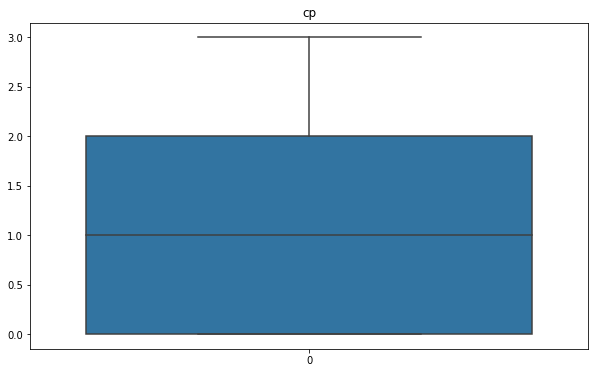

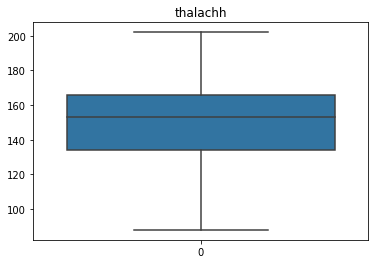

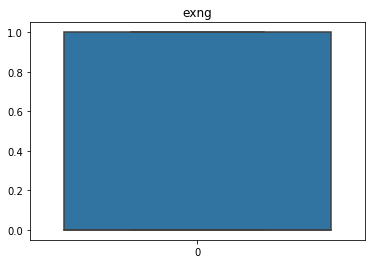

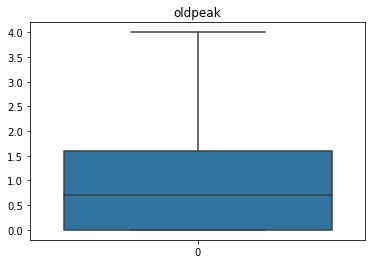

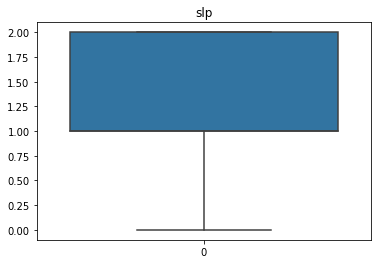

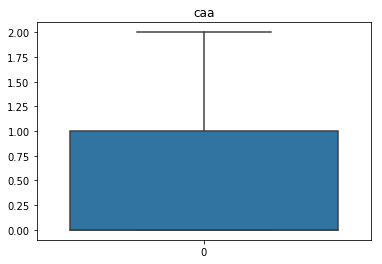

In [40]:
plt.figure(figsize=(10,6))
for col in col_name:
    plt.title(col)
    sns.boxplot(data=df[col])
    plt.show()
    

In [42]:
df = df.dropna()
df = df.drop('fbs',axis=1)

Correlation with the Target:
age        -0.193798
sex        -0.303271
cp          0.410807
trtbps     -0.135238
chol       -0.052796
restecg     0.122071
thalachh    0.384609
exng       -0.444401
oldpeak    -0.437895
slp         0.329432
caa        -0.460816
thall      -0.366390
Name: output, dtype: float64



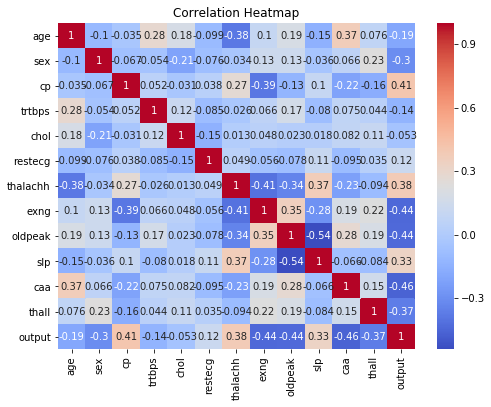

In [44]:
# Compute correlations between features and target
correlations = df.corr()['output'].drop('output')

# Print correlations
print("Correlation with the Target:")
print(correlations)
print()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [64]:
x = df[['cp','thalachh','exng','oldpeak','slp','caa']]
y = df.output
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape

(220, 6)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler();
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [66]:
y_train.shape

(220,)

In [77]:
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [78]:
y_train.shape

(220, 1)

In [74]:
from sklearn.linear_model import LogisticRegression

In [80]:
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

y_pred=model.predict(x_test_scaled)

accuracy=accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8363636363636363


C:\Users\shiva\ANACONDA\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Classification model using Decision Tree
from sklearn.tree import DecisionTreeClassifier
tc=DecisionTreeClassifier(criterion='entropy')
tc.fit(x_train_scaled,y_train)
y_pred=tc.predict(x_test_scaled)

print("Training Accuracy Score :",accuracy_score(y_pred,y_test))
print("Training Confusion Matrix  :",confusion_matrix(y_pred,y_test))